# The problem

The objective of this tutorial is to decode motor imagery tasks from EEG signals using two distinct Convolutional Neural Network (CNN) architectures: EEGNet and TSCeption. The dataset employed for this task is the IIa dataset from the BCI Competition 4. This dataset comprises EEG recordings from 9 different subjects, each performing four distinct motor imagery tasks.


# Dataset IIa from BCI Competition 4
This data set consists of EEG data from 9 subjects. <br>
Four different motor imagery tasks:
* Left Hand Movement (Class 1): Subjects are instructed to imagine movement of their left hand.
* Right Hand Movement (Class 2): Subjects are instructed to imagine movement of their right hand.
* Both Feet Movement (Class 3): Subjects are instructed to imagine movement of both feet.
* Tongue Movement (Class 4): Subjects are instructed to imagine movement of their tongue.

The signals were sampled with. 250 Hz and bandpass-filtered between 0.5 Hz and 100 Hz. The sensitivity of the amplifier was set to 100 μV . An additional 50 Hz notch filter was enabled to suppress line noise. <br>
At the beginning of a trial ( t = 0 s), a fixation cross appeared on the black screen. In addition, a short acoustic warning tone was presented. After two seconds ( t = 2 s), a cue in the form of an arrow pointing either to the left, right, down or up (corresponding to one of the four classes left hand, right hand, foot or tongue) <br>


We will classify EEG signals into one of the four motor imagery classes based on the brain activity recorded during the specified tasks. The utilization of EEGNet and TSCeption CNN architectures aims to demonstrate their effectiveness in decoding motor imagery from EEG data, providing a comprehensive understanding of thei application of Deep Learning on Brain-Computer Interfaces (BCI) research and development.

In [ ]:
%%capture
# installing dependencies
!pip install torcheeg moabb==0.5 mne

In [ ]:
from moabb.datasets import BNCI2014001
import mne

#Downloading data from Moabb
dataset_moabb = BNCI2014001()
data = dataset_moabb.get_data(subjects=[1])  # for only 1 subject

attributes = dataset_moabb.__dict__
print(attributes.keys())

# Extract EEG data for the first subject
subject_data = data[1]
eeg_data = []

# Loop through each session's data
for session_id, session_data in subject_data.items():
    eeg_data.append(session_data)

print(eeg_data[0])

print(dataset_moabb.event_id)
labels = dataset_moabb.event_id.keys()
print(labels)

/usr/local/lib/python3.10/dist-packages/moabb/datasets/download.py:54: RuntimeWarning: Setting non-standard config type: "MNE_DATASETS_BNCI_PATH"
  set_config(key, get_config("MNE_DATA"))


Tensorflow not install, you could not use those pipelines
To use the get_shape_from_baseconcar, InputShapeSetterEEG, BraindecodeDatasetLoaderyou need to install `braindecode`.`pip install braindecode` or Please refer to `https://braindecode.org`.
MNE_DATA is not already configured. It will be set to default location in the home directory - /root/mne_data
All datasets will be downloaded to this location, if anything is already downloaded, please move manually to this location


100%|█████████████████████████████████████| 42.8M/42.8M [00:00<00:00, 42.2GB/s]
SHA256 hash of downloaded file: 054f02e70cf9c4ada1517e9b9864f45407939c1062c6793516585c6f511d0325
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.
100%|█████████████████████████████████████| 43.8M/43.8M [00:00<00:00, 40.9GB/s]
SHA256 hash of downloaded file: 53d415f39c3d7b0c88b894d7b08d99bcdfe855ede63831d3691af1a45607fb62
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.


dict_keys(['subject_list', 'n_sessions', 'event_id', 'code', 'interval', 'paradigm', 'doi', 'unit_factor'])
{'run_0': <RawArray | 26 x 96735 (386.9 s), ~19.2 MB, data loaded>, 'run_1': <RawArray | 26 x 96735 (386.9 s), ~19.2 MB, data loaded>, 'run_2': <RawArray | 26 x 96735 (386.9 s), ~19.2 MB, data loaded>, 'run_3': <RawArray | 26 x 96735 (386.9 s), ~19.2 MB, data loaded>, 'run_4': <RawArray | 26 x 96735 (386.9 s), ~19.2 MB, data loaded>, 'run_5': <RawArray | 26 x 96735 (386.9 s), ~19.2 MB, data loaded>}
{'left_hand': 1, 'right_hand': 2, 'feet': 3, 'tongue': 4}
dict_keys(['left_hand', 'right_hand', 'feet', 'tongue'])


48 events found
Event IDs: [1 2 3 4]
Using matplotlib as 2D backend.


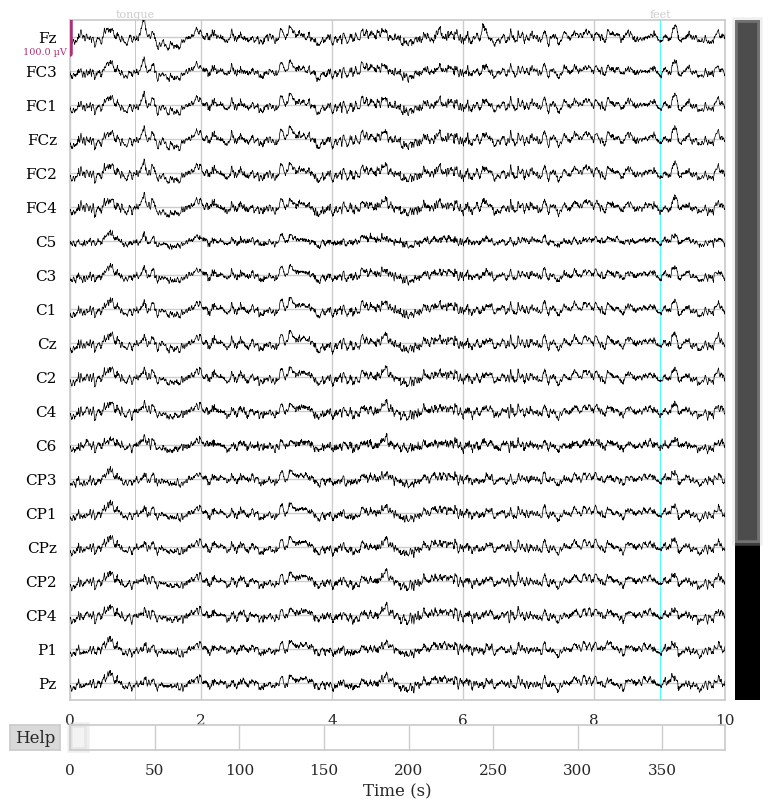

In [ ]:
# Load the first run of EEG data from the dataset
raw = eeg_data[0]["run_0"]

# Extract events from the STIM channel
events = mne.find_events(raw, stim_channel='stim', shortest_event=1)

# Plot the raw data with events
raw.plot(events=events, event_id=dataset_moabb.event_id, scalings={'eeg': 50e-6});

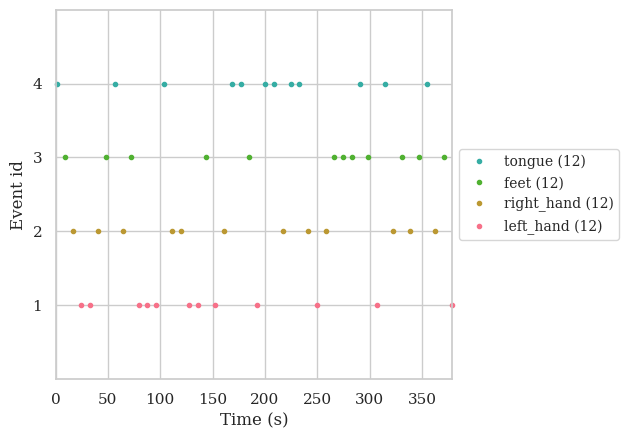

In [ ]:
# plot the events
mne.viz.plot_events(events, event_id=dataset_moabb.event_id, sfreq=raw.info['sfreq']);

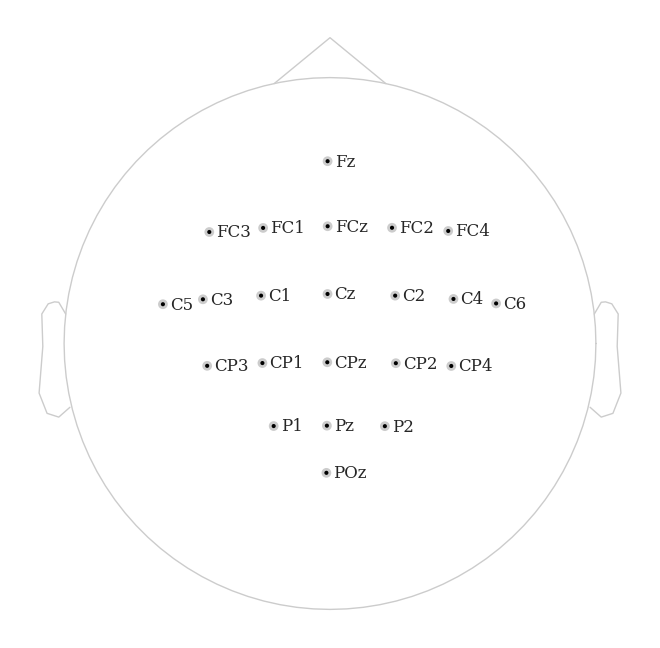

In [ ]:
 # Plot the sensor positions
 raw.plot_sensors(kind='topomap', show_names=True);

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.192 (s)


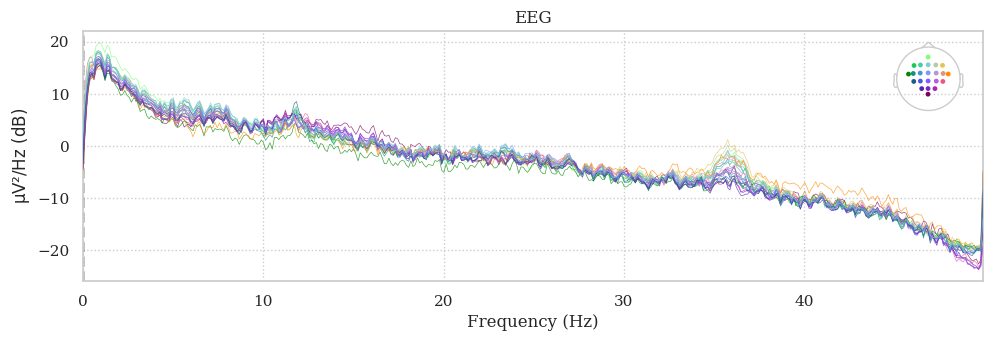

In [ ]:
# Plot the PSD of the channels at once
raw.plot_psd(fmax = 50);  # For frequencies from 0.5 to 50 Hz

We will generate time-frequency plots for the different event types, showing how the power spectral density changes over time and frequency for each event. The baseline correction helps in highlighting relative changes in power.

Not setting metadata
48 matching events found
Setting baseline interval to [-0.5, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 12 events and 1626 original time points ...
0 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: logratio)


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


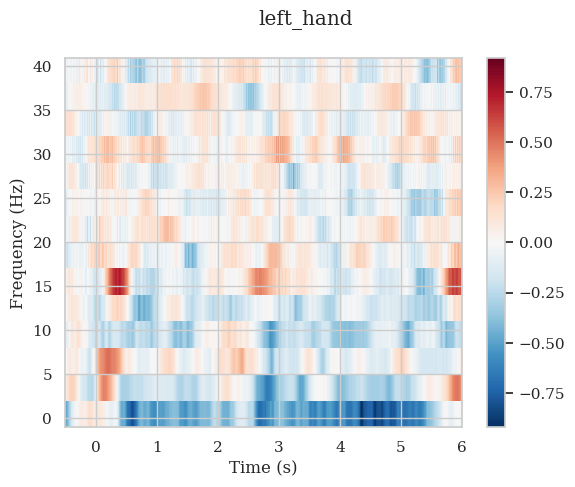

Using data from preloaded Raw for 12 events and 1626 original time points ...
0 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: logratio)


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


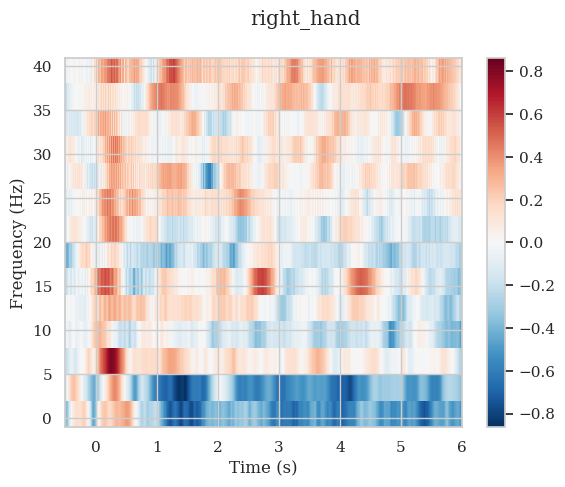

Using data from preloaded Raw for 12 events and 1626 original time points ...
0 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: logratio)


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.4s


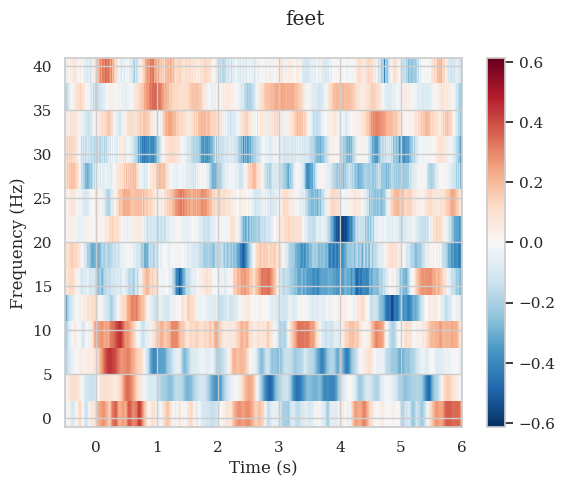

Using data from preloaded Raw for 12 events and 1626 original time points ...
0 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: logratio)


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.4s


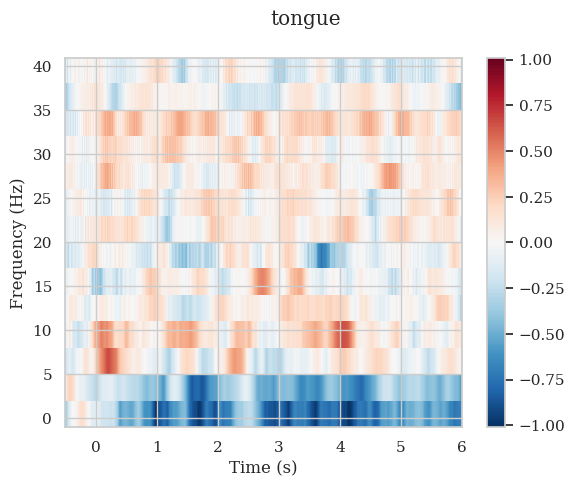

In [ ]:
import numpy as np

# Create epochs object from the raw data, using the events and time intervals
epochs = mne.Epochs(raw, events, event_id=dataset_moabb.event_id, tmin=-0.5, tmax=6.0, baseline=(None, 0))

# Define the frequency range (0.5 to 40 Hz) and the step size (3 Hz)
fmin, fmax = 0.5, 40
freqs = np.arange(fmin, fmax + 1, 3)

# Define the number of cycles for each frequency (frequency/2)
n_cycles = freqs / 2

# Set the time bandwidth for multitaper spectral estimation
time_bandwidth = 2.0

# Loop through each event type in the dataset
for event in dataset_moabb.event_id:
    # Calculate the time-frequency representation using the multitaper method
    power = mne.time_frequency.tfr_multitaper(epochs[event], freqs=freqs, n_cycles=n_cycles,
                                              time_bandwidth=time_bandwidth, return_itc=False)
    # Plot the power spectral density for each event type, using a log ratio baseline correction
    power.plot([0], baseline=(None, 0), mode='logratio', title=event);

In [ ]:
import ipywidgets as widgets
from IPython.display import display


def plot_topo_for_event(event):
    """Function to plot topographical map for the selected event."""
    evoked = epochs[event].average()
    evoked.plot_topo(title=event)

# Create a dropdown widget with event names
event_dropdown = widgets.Dropdown(
    options=list(dataset_moabb.event_id.keys()),
    value=list(dataset_moabb.event_id.keys())[0],
    description='Event:',
)

# Create an interactive widget
widgets.interactive(plot_topo_for_event, event=event_dropdown)


interactive(children=(Dropdown(description='Event:', options=('left_hand', 'right_hand', 'feet', 'tongue'), va…

In [ ]:
import ipywidgets as widgets
from IPython.display import display

# Define the time range to extract epochs (in seconds)
tmin, tmax = -0.2, 6.0

# Create a dropdown widget with event names
event_dropdown = widgets.Dropdown(
    options=list(dataset_moabb.event_id.keys()),
    value=list(dataset_moabb.event_id.keys())[0],
    description='Event:'
)

# Create a slider for time
time_slider = widgets.FloatSlider(value=0, min=tmin, max=tmax, step=0.5, description='Time:')

# Interactive function
@widgets.interactive
def plot_topomap(event=event_dropdown, time=time_slider):
    """Function to plot topographical map for the selected event."""
    evoked = epochs[event].average()
    evoked.plot_topomap(times=[time], size=4, res=300)

# Display the interactive plot
display(plot_topomap)


interactive(children=(Dropdown(description='Event:', options=('left_hand', 'right_hand', 'feet', 'tongue'), va…

In [ ]:
import torcheeg.datasets.moabb as moabb_dataset
from torcheeg import transforms

from moabb.datasets import BNCI2014001
from moabb.paradigms import LeftRightImagery, MotorImagery

dataset = BNCI2014001()
dataset.subject_list = [1, 2, 3]
paradigm = MotorImagery()
dataset = moabb_dataset.MOABBDataset(
    dataset=dataset,
    paradigm=paradigm,
    io_path='./moabb/BNCI2014001/TSCeption',
    offline_transform=transforms.Compose([
                                          transforms.To2d()
                                          ]),
    online_transform=transforms.ToTensor(),
    label_transform=transforms.Compose([
    transforms.Select('label'),
    transforms.Mapping({
        'left_hand': 0,
        'right_hand': 1,
        'feet': 2,
        'tongue': 3
    })
  ]))

dataset does not exist at path ./moabb/BNCI2014001/TSCeption, generating files to path...


100%|█████████████████████████████████████| 42.8M/42.8M [00:00<00:00, 8.78GB/s]
SHA256 hash of downloaded file: 054f02e70cf9c4ada1517e9b9864f45407939c1062c6793516585c6f511d0325
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.
100%|█████████████████████████████████████| 43.8M/43.8M [00:00<00:00, 36.2GB/s]
SHA256 hash of downloaded file: 53d415f39c3d7b0c88b894d7b08d99bcdfe855ede63831d3691af1a45607fb62
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.
100%|█████████████████████████████████████| 43.1M/43.1M [00:00<00:00, 11.6GB/s]
SHA256 hash of downloaded file: 5ddd5cb520b1692c3ba1363f48d98f58f0e46f3699ee50d749947950fc39db27
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.
100%|████████████████████████████████

In [ ]:
print(dataset[0][0].shape)
# batch, 1, num_ch, samples

torch.Size([1, 22, 1001])


K-Fold cross-validation is a technique to assess the performance and generalization ability of a model. It involves splitting your dataset into K equally sized "folds" or subsets.

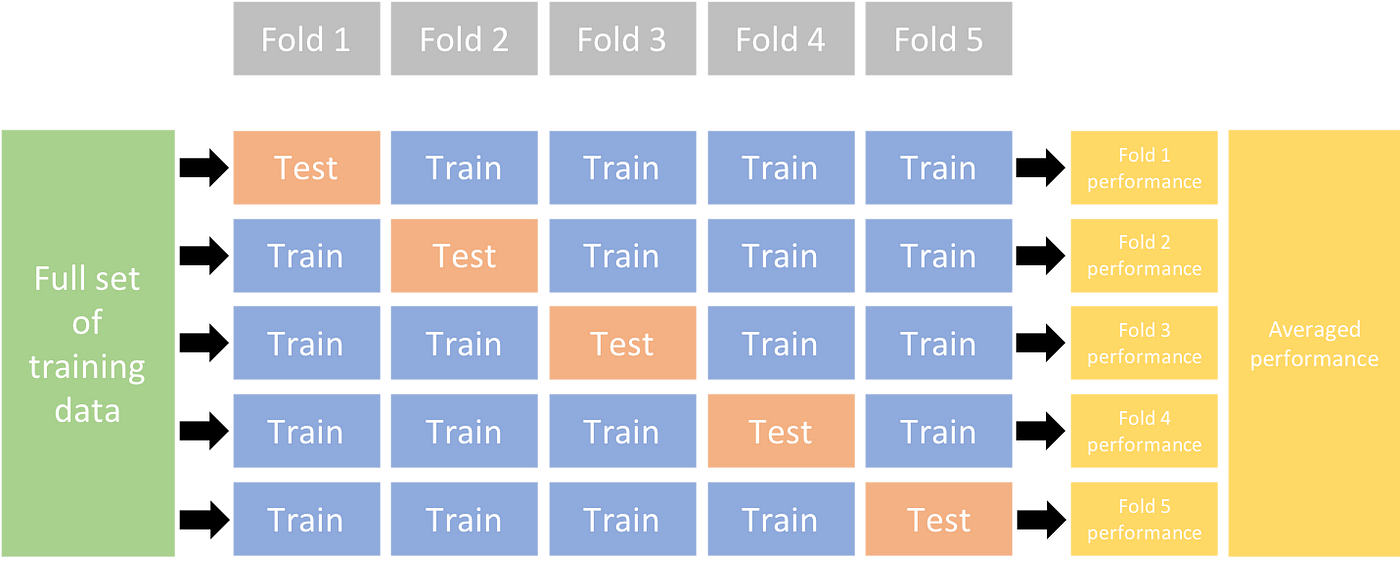

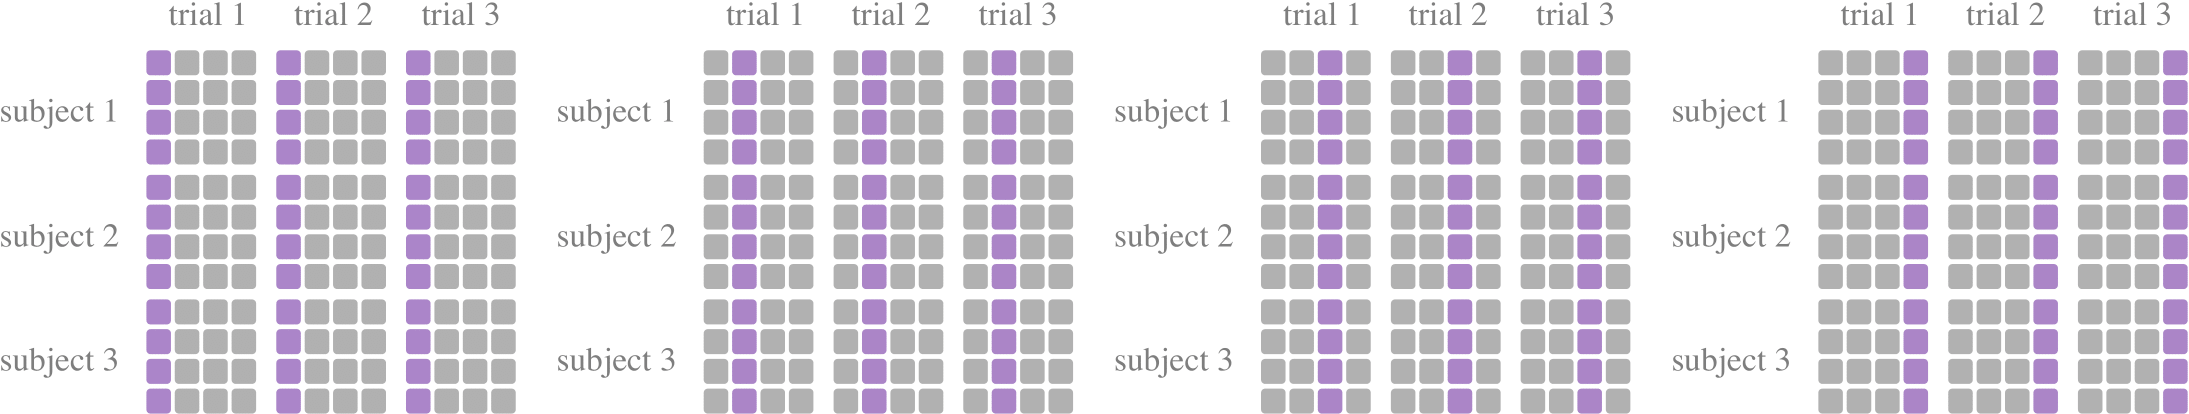

KFoldGroupbyTrial devides subsets at the dimension of trials. Unlike traditional k-fold where data is divided randomly or sequentially, this class organizes data by trials, ensuring that each fold is separated at the trial level. Take the first partition with k=5 as an example, the first 80% of samples of each trial are used for training, and the last 20% of samples are used for testing. It is more consistent with real applications and can test the generalization of the model to a certain extent.

In [ ]:
# Kfolds TSCeption
import torcheeg.datasets.moabb as moabb_dataset
from torcheeg import transforms

from moabb.datasets import BNCI2014001
from moabb.paradigms import MotorImagery
from torch.utils.data import DataLoader
import torch

import numpy as np
from torcheeg.model_selection import KFoldGroupbyTrial


import torcheeg.datasets.moabb as moabb_dataset
from torcheeg import transforms

k_fold = KFoldGroupbyTrial(n_splits=5,
                           split_path='./tmp_out/TSCeption/kfold_split/',
                           shuffle=True,
                           random_state=42)

# TSCeption architechture
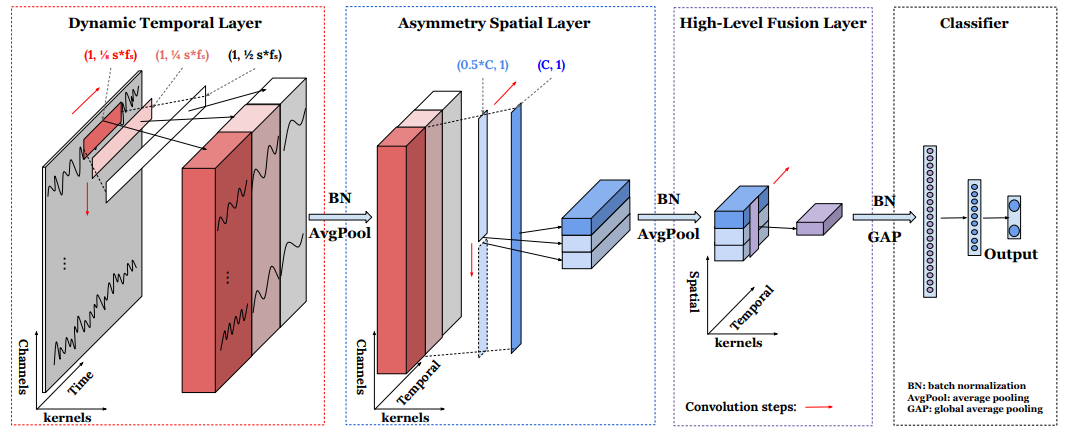

In [ ]:
from torcheeg.models.cnn import TSCeption

from torcheeg.trainers import ClassifierTrainer

import pytorch_lightning as pl

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc
import seaborn as sns

all_true_labels = []
all_predicted_labels = []
all_predicted_probs = []
fold_accuracies = []

for i, (train_dataset, val_dataset) in enumerate(k_fold.split(dataset)):
    train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)

    model = TSCeption(num_classes=4,
                  num_electrodes=22,
                  sampling_rate=128,
                  num_T=15,
                  num_S=15,
                  hid_channels=32,
                  dropout=0.5)

    trainer = ClassifierTrainer(model=model,
                                num_classes=4,
                                lr=1e-4,
                                weight_decay=1e-4,
                                accelerator="gpu")
    trainer.fit(train_loader,
                val_loader,
                max_epochs=30,
                default_root_dir=f'./tmp_out/TSCeption/model/{i}',
                callbacks=[pl.callbacks.ModelCheckpoint(save_last=True)],
                enable_progress_bar=True,
                enable_model_summary=True,
                limit_val_batches=0.0)
    score = trainer.test(val_loader,
                        enable_progress_bar=True,
                        enable_model_summary=True)[0]
    fold_accuracy = score["test_accuracy"]
    print(f'==> Fold {i} test accuracy: {fold_accuracy:.4f}')
    fold_accuracies.append(fold_accuracy)

    # evaluated the model created in every fold
    model.eval()
    with torch.no_grad():
        for data, true_labels in val_loader:
            outputs = model(data)
            _, predicted_labels = torch.max(outputs, 1)

            all_true_labels.extend(true_labels.cpu().numpy())
            all_predicted_labels.extend(predicted_labels.cpu().numpy())
            all_predicted_probs.extend(torch.nn.functional.softmax(outputs, dim=1).cpu().numpy())


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name          | Type             | Params
---------------------------------------------------
0 | model         | TSCeption        | 10.6 K
1 | ce_fn         | CrossEntropyLoss | 0     
2 | train_loss    | MeanMetric       | 0     
3 | val_loss      | MeanMetric       | 0     
4 | test_loss     | MeanMetric       | 0     
5 | train_metrics | MetricCollection | 0     
6 | val_metrics   | MetricCollection | 0     
7 | test_metrics  | MetricCollection | 0     
---------------------------------------------------
10.6 K    Trainable params


Training: |          | 0/? [00:00<?, ?it/s]


[Train] train_loss: 1.393 train_accuracy: 0.276 


[Train] train_loss: 1.376 train_accuracy: 0.274 


[Train] train_loss: 1.375 train_accuracy: 0.300 


[Train] train_loss: 1.362 train_accuracy: 0.311 


[Train] train_loss: 1.359 train_accuracy: 0.311 


[Train] train_loss: 1.356 train_accuracy: 0.330 


[Train] train_loss: 1.341 train_accuracy: 0.338 


[Train] train_loss: 1.342 train_accuracy: 0.359 


[Train] train_loss: 1.334 train_accuracy: 0.372 


[Train] train_loss: 1.327 train_accuracy: 0.368 


[Train] train_loss: 1.319 train_accuracy: 0.382 


[Train] train_loss: 1.306 train_accuracy: 0.406 


[Train] train_loss: 1.286 train_accuracy: 0.420 


[Train] train_loss: 1.278 train_accuracy: 0.426 


[Train] train_loss: 1.272 train_accuracy: 0.426 


[Train] train_loss: 1.261 train_accuracy: 0.432 


[Train] train_loss: 1.250 train_accuracy: 0.444 


[Train] train_loss: 1.245 train_accuracy: 0.437 


[Train] train_loss: 1.235 train_accuracy: 0.439 


[Train] train_loss: 1.233 trai

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=30` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



[Train] train_loss: 1.153 train_accuracy: 0.499 



/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=1` in the `DataLoader` to improve performance.


Testing: |          | 0/? [00:00<?, ?it/s]


[Test] test_loss: 1.131 test_accuracy: 0.500 



┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       test_accuracy       │            0.5            │
│         test_loss         │    1.1309021711349487     │
└───────────────────────────┴───────────────────────────┘

==> Fold 0 test accuracy: 0.5000


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name          | Type             | Params
---------------------------------------------------
0 | model         | TSCeption        | 10.6 K
1 | ce_fn         | CrossEntropyLoss | 0     
2 | train_loss    | MeanMetric       | 0     
3 | val_loss      | MeanMetric       | 0     
4 | test_loss     | MeanMetric       | 0     
5 | train_metrics | MetricCollection | 0     
6 | val_metrics   | MetricCollection | 0     
7 | test_metrics  | MetricCollection | 0     
---------------------------------------------------
10.6 K    Trainable params


Training: |          | 0/? [00:00<?, ?it/s]


[Train] train_loss: 1.393 train_accuracy: 0.252 


[Train] train_loss: 1.388 train_accuracy: 0.270 


[Train] train_loss: 1.379 train_accuracy: 0.291 


[Train] train_loss: 1.378 train_accuracy: 0.307 


[Train] train_loss: 1.368 train_accuracy: 0.284 


[Train] train_loss: 1.361 train_accuracy: 0.323 


[Train] train_loss: 1.356 train_accuracy: 0.325 


[Train] train_loss: 1.348 train_accuracy: 0.348 


[Train] train_loss: 1.341 train_accuracy: 0.354 


[Train] train_loss: 1.336 train_accuracy: 0.356 


[Train] train_loss: 1.332 train_accuracy: 0.343 


[Train] train_loss: 1.327 train_accuracy: 0.368 


[Train] train_loss: 1.321 train_accuracy: 0.373 


[Train] train_loss: 1.314 train_accuracy: 0.374 


[Train] train_loss: 1.304 train_accuracy: 0.397 


[Train] train_loss: 1.295 train_accuracy: 0.403 


[Train] train_loss: 1.289 train_accuracy: 0.402 


[Train] train_loss: 1.279 train_accuracy: 0.425 


[Train] train_loss: 1.271 train_accuracy: 0.419 


[Train] train_loss: 1.261 trai

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=30` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



[Train] train_loss: 1.185 train_accuracy: 0.467 



/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=1` in the `DataLoader` to improve performance.


Testing: |          | 0/? [00:00<?, ?it/s]


[Test] test_loss: 1.140 test_accuracy: 0.497 



┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       test_accuracy       │    0.49707603454589844    │
│         test_loss         │    1.1395478248596191     │
└───────────────────────────┴───────────────────────────┘

==> Fold 1 test accuracy: 0.4971


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name          | Type             | Params
---------------------------------------------------
0 | model         | TSCeption        | 10.6 K
1 | ce_fn         | CrossEntropyLoss | 0     
2 | train_loss    | MeanMetric       | 0     
3 | val_loss      | MeanMetric       | 0     
4 | test_loss     | MeanMetric       | 0     
5 | train_metrics | MetricCollection | 0     
6 | val_metrics   | MetricCollection | 0     
7 | test_metrics  | MetricCollection | 0     
---------------------------------------------------
10.6 K    Trainable params


Training: |          | 0/? [00:00<?, ?it/s]


[Train] train_loss: 1.394 train_accuracy: 0.258 


[Train] train_loss: 1.390 train_accuracy: 0.271 


[Train] train_loss: 1.382 train_accuracy: 0.286 


[Train] train_loss: 1.379 train_accuracy: 0.276 


[Train] train_loss: 1.374 train_accuracy: 0.291 


[Train] train_loss: 1.366 train_accuracy: 0.313 


[Train] train_loss: 1.360 train_accuracy: 0.312 


[Train] train_loss: 1.355 train_accuracy: 0.312 


[Train] train_loss: 1.348 train_accuracy: 0.327 


[Train] train_loss: 1.339 train_accuracy: 0.348 


[Train] train_loss: 1.335 train_accuracy: 0.341 


[Train] train_loss: 1.321 train_accuracy: 0.373 


[Train] train_loss: 1.317 train_accuracy: 0.367 


[Train] train_loss: 1.310 train_accuracy: 0.385 


[Train] train_loss: 1.301 train_accuracy: 0.374 


[Train] train_loss: 1.286 train_accuracy: 0.398 


[Train] train_loss: 1.272 train_accuracy: 0.416 


[Train] train_loss: 1.263 train_accuracy: 0.442 


[Train] train_loss: 1.255 train_accuracy: 0.430 


[Train] train_loss: 1.247 trai

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=30` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



[Train] train_loss: 1.168 train_accuracy: 0.455 



/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=1` in the `DataLoader` to improve performance.


Testing: |          | 0/? [00:00<?, ?it/s]


[Test] test_loss: 1.175 test_accuracy: 0.368 



┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       test_accuracy       │    0.3684210479259491     │
│         test_loss         │    1.1754857301712036     │
└───────────────────────────┴───────────────────────────┘

==> Fold 2 test accuracy: 0.3684


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name          | Type             | Params
---------------------------------------------------
0 | model         | TSCeption        | 10.6 K
1 | ce_fn         | CrossEntropyLoss | 0     
2 | train_loss    | MeanMetric       | 0     
3 | val_loss      | MeanMetric       | 0     
4 | test_loss     | MeanMetric       | 0     
5 | train_metrics | MetricCollection | 0     
6 | val_metrics   | MetricCollection | 0     
7 | test_metrics  | MetricCollection | 0     
---------------------------------------------------
10.6 K    Trainable params


Training: |          | 0/? [00:00<?, ?it/s]


[Train] train_loss: 1.392 train_accuracy: 0.263 


[Train] train_loss: 1.382 train_accuracy: 0.274 


[Train] train_loss: 1.378 train_accuracy: 0.289 


[Train] train_loss: 1.366 train_accuracy: 0.292 


[Train] train_loss: 1.365 train_accuracy: 0.304 


[Train] train_loss: 1.361 train_accuracy: 0.305 


[Train] train_loss: 1.351 train_accuracy: 0.319 


[Train] train_loss: 1.348 train_accuracy: 0.324 


[Train] train_loss: 1.339 train_accuracy: 0.333 


[Train] train_loss: 1.328 train_accuracy: 0.350 


[Train] train_loss: 1.327 train_accuracy: 0.356 


[Train] train_loss: 1.315 train_accuracy: 0.356 


[Train] train_loss: 1.305 train_accuracy: 0.385 


[Train] train_loss: 1.291 train_accuracy: 0.395 


[Train] train_loss: 1.277 train_accuracy: 0.400 


[Train] train_loss: 1.271 train_accuracy: 0.400 


[Train] train_loss: 1.263 train_accuracy: 0.420 


[Train] train_loss: 1.252 train_accuracy: 0.416 


[Train] train_loss: 1.248 train_accuracy: 0.431 


[Train] train_loss: 1.232 trai

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=30` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



[Train] train_loss: 1.162 train_accuracy: 0.467 



/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=1` in the `DataLoader` to improve performance.


Testing: |          | 0/? [00:00<?, ?it/s]


[Test] test_loss: 1.171 test_accuracy: 0.404 



┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       test_accuracy       │    0.4035087823867798     │
│         test_loss         │    1.1707972288131714     │
└───────────────────────────┴───────────────────────────┘

==> Fold 3 test accuracy: 0.4035


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name          | Type             | Params
---------------------------------------------------
0 | model         | TSCeption        | 10.6 K
1 | ce_fn         | CrossEntropyLoss | 0     
2 | train_loss    | MeanMetric       | 0     
3 | val_loss      | MeanMetric       | 0     
4 | test_loss     | MeanMetric       | 0     
5 | train_metrics | MetricCollection | 0     
6 | val_metrics   | MetricCollection | 0     
7 | test_metrics  | MetricCollection | 0     
---------------------------------------------------
10.6 K    Trainable params


Training: |          | 0/? [00:00<?, ?it/s]


[Train] train_loss: 1.388 train_accuracy: 0.272 


[Train] train_loss: 1.389 train_accuracy: 0.281 


[Train] train_loss: 1.381 train_accuracy: 0.280 


[Train] train_loss: 1.380 train_accuracy: 0.297 


[Train] train_loss: 1.376 train_accuracy: 0.300 


[Train] train_loss: 1.369 train_accuracy: 0.299 


[Train] train_loss: 1.366 train_accuracy: 0.322 


[Train] train_loss: 1.368 train_accuracy: 0.315 


[Train] train_loss: 1.363 train_accuracy: 0.322 


[Train] train_loss: 1.356 train_accuracy: 0.330 


[Train] train_loss: 1.353 train_accuracy: 0.343 


[Train] train_loss: 1.340 train_accuracy: 0.370 


[Train] train_loss: 1.336 train_accuracy: 0.356 


[Train] train_loss: 1.323 train_accuracy: 0.393 


[Train] train_loss: 1.321 train_accuracy: 0.382 


[Train] train_loss: 1.318 train_accuracy: 0.377 


[Train] train_loss: 1.307 train_accuracy: 0.388 


[Train] train_loss: 1.295 train_accuracy: 0.409 


[Train] train_loss: 1.296 train_accuracy: 0.408 


[Train] train_loss: 1.283 trai

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=30` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



[Train] train_loss: 1.213 train_accuracy: 0.445 



/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=1` in the `DataLoader` to improve performance.


Testing: |          | 0/? [00:00<?, ?it/s]


[Test] test_loss: 1.172 test_accuracy: 0.497 



┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       test_accuracy       │    0.49707603454589844    │
│         test_loss         │    1.1720471382141113     │
└───────────────────────────┴───────────────────────────┘

==> Fold 4 test accuracy: 0.4971


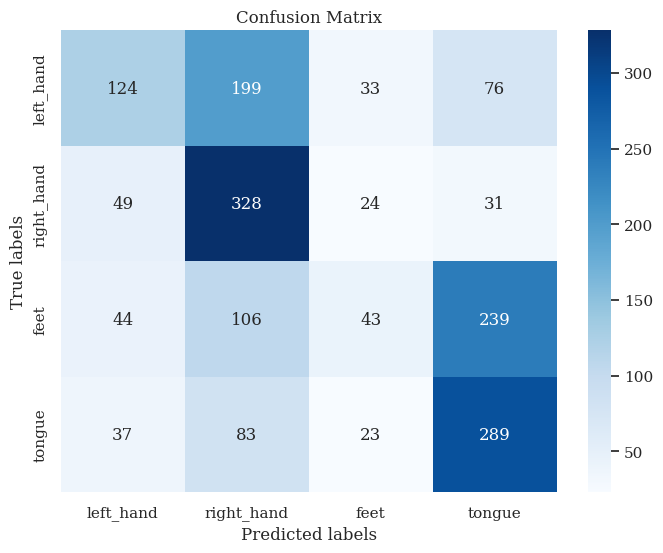

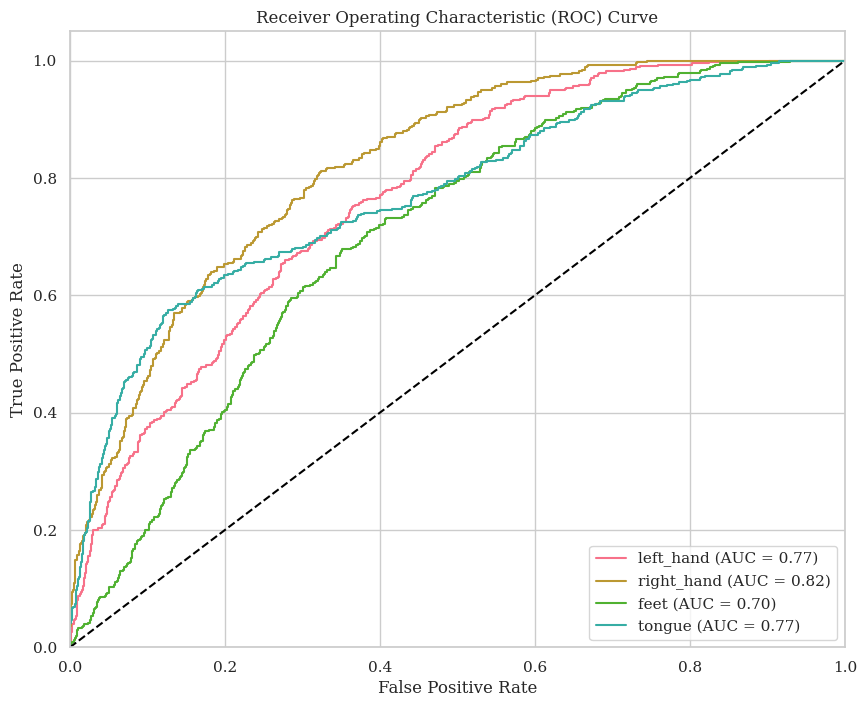

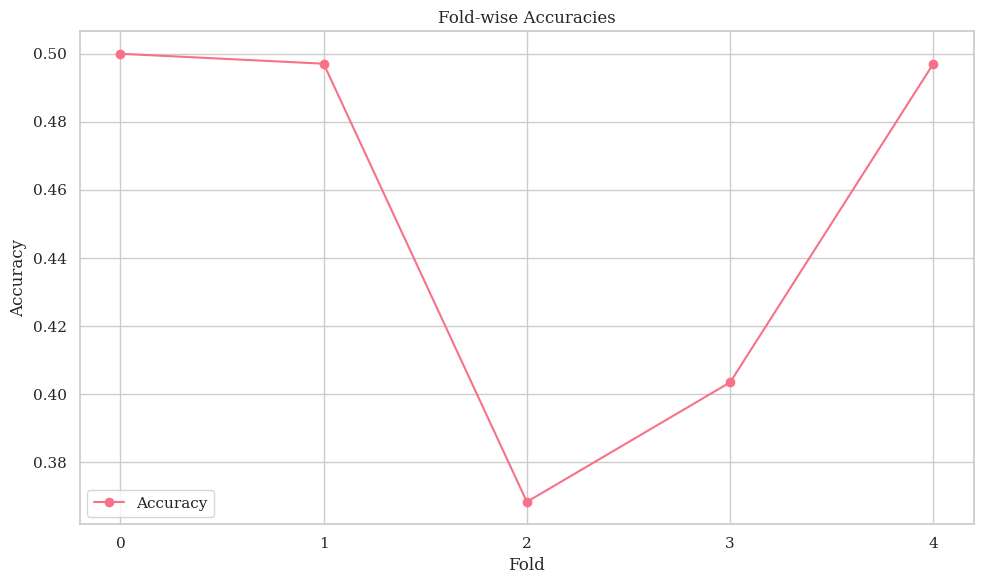

In [ ]:
# Plotting metrics
import matplotlib.pyplot as plt

# Confussion Matrix
labels = ["left_hand", "right_hand", "feet", "tongue"]

cm = confusion_matrix(all_true_labels, all_predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Plot ROC curve
true_labels_onehot = np.eye(4)[all_true_labels]  # Adjusted for 4 classes

plt.figure(figsize=(10, 8))
for i, label in enumerate(labels):
    fpr, tpr, _ = roc_curve(true_labels_onehot[:, i], np.array(all_predicted_probs)[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='%s (AUC = %0.2f)' % (label, roc_auc))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


# Fold accuracies

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(fold_accuracies, '-o', label='Accuracy')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Fold-wise Accuracies')
plt.xticks(range(len(fold_accuracies)))  # set x-ticks to be the fold numbers
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Results <br>
* After running the model for around 30 epochs with the current parameters you should get an AUC score of 0.7 on all 4 prediction categories. <br>
***The confusion matrix** provides a visual representation of the model's performance in classifying instances into different classes.
***Interpretation:** Each cell in the matrix represents the count of instances for a specific combination of true and predicted classes. The diagonal elements represent correctly classified instances, while off-diagonal elements represent misclassifications. Annotated values in each cell show the count. <br>
*The **ROC curve** illustrates the trade-off between true positive rate (sensitivity) and false positive rate (1 - specificity) for different classification thresholds. **Interpretation:** AUC (Area Under the Curve) is a measure of the model's ability to distinguish between classes. The higher the AUC, the better the model's discriminatory power. Each curve corresponds to a class, and the diagonal line represents random guessing. <br>
*Plotting the **Accuracy** for each fold provides insights into the model's performance across different subsets of the dataset (cross-validation). **Interpretation:** The line plot shows how accuracy varies across different folds. It helps identify if the model's performance is consistent or if there are variations depending on the subset of data used for training and testing.

# EEGNet Architechture
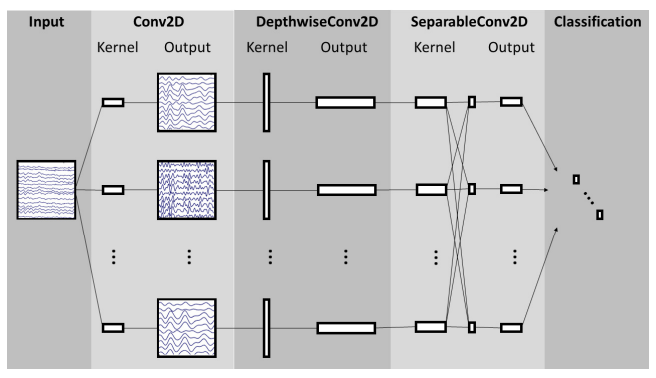

dataset already exists at path ./moabb/BNCI2014001/eegnet, reading from path...
torch.Size([1, 22, 1001])


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name          | Type             | Params
---------------------------------------------------
0 | model         | EEGNet           | 3.4 K 
1 | ce_fn         | CrossEntropyLoss | 0     
2 | train_loss    | MeanMetric       | 0     
3 | val_loss      | MeanMetric       | 0     
4 | test_loss     | MeanMetric       | 0     
5 | train_metrics | MetricCollection | 0     
6 | val_metrics   | MetricCollection | 0     
7 | test_metrics  | MetricCollection | 0     
---------------------------------------------------
3.4 K     Trainable params


Training: |          | 0/? [00:00<?, ?it/s]


[Train] train_loss: 1.408 train_accuracy: 0.253 


[Train] train_loss: 1.407 train_accuracy: 0.230 


[Train] train_loss: 1.387 train_accuracy: 0.276 


[Train] train_loss: 1.402 train_accuracy: 0.249 


[Train] train_loss: 1.391 train_accuracy: 0.261 


[Train] train_loss: 1.394 train_accuracy: 0.273 


[Train] train_loss: 1.384 train_accuracy: 0.267 


[Train] train_loss: 1.389 train_accuracy: 0.272 


[Train] train_loss: 1.388 train_accuracy: 0.259 


[Train] train_loss: 1.378 train_accuracy: 0.271 


[Train] train_loss: 1.375 train_accuracy: 0.279 


[Train] train_loss: 1.365 train_accuracy: 0.309 


[Train] train_loss: 1.371 train_accuracy: 0.290 


[Train] train_loss: 1.362 train_accuracy: 0.296 


[Train] train_loss: 1.350 train_accuracy: 0.334 


[Train] train_loss: 1.351 train_accuracy: 0.337 


[Train] train_loss: 1.350 train_accuracy: 0.330 


[Train] train_loss: 1.348 train_accuracy: 0.325 


[Train] train_loss: 1.339 train_accuracy: 0.324 


[Train] train_loss: 1.330 trai

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=30` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



[Train] train_loss: 1.270 train_accuracy: 0.374 



/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=1` in the `DataLoader` to improve performance.


Testing: |          | 0/? [00:00<?, ?it/s]


[Test] test_loss: 1.272 test_accuracy: 0.361 



┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       test_accuracy       │    0.3611111044883728     │
│         test_loss         │     1.272271990776062     │
└───────────────────────────┴───────────────────────────┘

Fold 0 test accuracy: 0.3611


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name          | Type             | Params
---------------------------------------------------
0 | model         | EEGNet           | 3.4 K 
1 | ce_fn         | CrossEntropyLoss | 0     
2 | train_loss    | MeanMetric       | 0     
3 | val_loss      | MeanMetric       | 0     
4 | test_loss     | MeanMetric       | 0     
5 | train_metrics | MetricCollection | 0     
6 | val_metrics   | MetricCollection | 0     
7 | test_metrics  | MetricCollection | 0     
---------------------------------------------------
3.4 K     Trainable params


Training: |          | 0/? [00:00<?, ?it/s]


[Train] train_loss: 1.403 train_accuracy: 0.237 


[Train] train_loss: 1.402 train_accuracy: 0.247 


[Train] train_loss: 1.395 train_accuracy: 0.254 


[Train] train_loss: 1.387 train_accuracy: 0.280 


[Train] train_loss: 1.395 train_accuracy: 0.263 


[Train] train_loss: 1.399 train_accuracy: 0.266 


[Train] train_loss: 1.393 train_accuracy: 0.264 


[Train] train_loss: 1.377 train_accuracy: 0.304 


[Train] train_loss: 1.377 train_accuracy: 0.302 


[Train] train_loss: 1.362 train_accuracy: 0.330 


[Train] train_loss: 1.375 train_accuracy: 0.299 


[Train] train_loss: 1.367 train_accuracy: 0.305 


[Train] train_loss: 1.361 train_accuracy: 0.325 


[Train] train_loss: 1.364 train_accuracy: 0.309 


[Train] train_loss: 1.356 train_accuracy: 0.325 


[Train] train_loss: 1.345 train_accuracy: 0.316 


[Train] train_loss: 1.341 train_accuracy: 0.335 


[Train] train_loss: 1.334 train_accuracy: 0.356 


[Train] train_loss: 1.332 train_accuracy: 0.356 


[Train] train_loss: 1.331 trai

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=30` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



[Train] train_loss: 1.246 train_accuracy: 0.406 



/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=1` in the `DataLoader` to improve performance.


Testing: |          | 0/? [00:00<?, ?it/s]


[Test] test_loss: 1.208 test_accuracy: 0.453 



┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       test_accuracy       │    0.4532163739204407     │
│         test_loss         │    1.2084671258926392     │
└───────────────────────────┴───────────────────────────┘

Fold 1 test accuracy: 0.4532


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name          | Type             | Params
---------------------------------------------------
0 | model         | EEGNet           | 3.4 K 
1 | ce_fn         | CrossEntropyLoss | 0     
2 | train_loss    | MeanMetric       | 0     
3 | val_loss      | MeanMetric       | 0     
4 | test_loss     | MeanMetric       | 0     
5 | train_metrics | MetricCollection | 0     
6 | val_metrics   | MetricCollection | 0     
7 | test_metrics  | MetricCollection | 0     
---------------------------------------------------
3.4 K     Trainable params


Training: |          | 0/? [00:00<?, ?it/s]


[Train] train_loss: 1.397 train_accuracy: 0.271 


[Train] train_loss: 1.399 train_accuracy: 0.258 


[Train] train_loss: 1.393 train_accuracy: 0.266 


[Train] train_loss: 1.379 train_accuracy: 0.282 


[Train] train_loss: 1.382 train_accuracy: 0.284 


[Train] train_loss: 1.389 train_accuracy: 0.260 


[Train] train_loss: 1.384 train_accuracy: 0.295 


[Train] train_loss: 1.382 train_accuracy: 0.273 


[Train] train_loss: 1.380 train_accuracy: 0.287 


[Train] train_loss: 1.381 train_accuracy: 0.266 


[Train] train_loss: 1.380 train_accuracy: 0.302 


[Train] train_loss: 1.369 train_accuracy: 0.302 


[Train] train_loss: 1.366 train_accuracy: 0.314 


[Train] train_loss: 1.369 train_accuracy: 0.304 


[Train] train_loss: 1.362 train_accuracy: 0.318 


[Train] train_loss: 1.362 train_accuracy: 0.315 


[Train] train_loss: 1.353 train_accuracy: 0.311 


[Train] train_loss: 1.362 train_accuracy: 0.320 


[Train] train_loss: 1.348 train_accuracy: 0.343 


[Train] train_loss: 1.353 trai

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=30` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



[Train] train_loss: 1.299 train_accuracy: 0.372 



/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=1` in the `DataLoader` to improve performance.


Testing: |          | 0/? [00:00<?, ?it/s]


[Test] test_loss: 1.285 test_accuracy: 0.348 



┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       test_accuracy       │    0.3479532301425934     │
│         test_loss         │    1.2854357957839966     │
└───────────────────────────┴───────────────────────────┘

Fold 2 test accuracy: 0.3480


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name          | Type             | Params
---------------------------------------------------
0 | model         | EEGNet           | 3.4 K 
1 | ce_fn         | CrossEntropyLoss | 0     
2 | train_loss    | MeanMetric       | 0     
3 | val_loss      | MeanMetric       | 0     
4 | test_loss     | MeanMetric       | 0     
5 | train_metrics | MetricCollection | 0     
6 | val_metrics   | MetricCollection | 0     
7 | test_metrics  | MetricCollection | 0     
---------------------------------------------------
3.4 K     Trainable params


Training: |          | 0/? [00:00<?, ?it/s]


[Train] train_loss: 1.403 train_accuracy: 0.250 


[Train] train_loss: 1.400 train_accuracy: 0.247 


[Train] train_loss: 1.392 train_accuracy: 0.279 


[Train] train_loss: 1.388 train_accuracy: 0.271 


[Train] train_loss: 1.385 train_accuracy: 0.272 


[Train] train_loss: 1.378 train_accuracy: 0.289 


[Train] train_loss: 1.382 train_accuracy: 0.276 


[Train] train_loss: 1.370 train_accuracy: 0.309 


[Train] train_loss: 1.370 train_accuracy: 0.278 


[Train] train_loss: 1.360 train_accuracy: 0.309 


[Train] train_loss: 1.355 train_accuracy: 0.328 


[Train] train_loss: 1.343 train_accuracy: 0.330 


[Train] train_loss: 1.343 train_accuracy: 0.329 


[Train] train_loss: 1.340 train_accuracy: 0.334 


[Train] train_loss: 1.334 train_accuracy: 0.339 


[Train] train_loss: 1.314 train_accuracy: 0.373 


[Train] train_loss: 1.305 train_accuracy: 0.369 


[Train] train_loss: 1.291 train_accuracy: 0.395 


[Train] train_loss: 1.285 train_accuracy: 0.374 


[Train] train_loss: 1.274 trai

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=30` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



[Train] train_loss: 1.198 train_accuracy: 0.449 



/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=1` in the `DataLoader` to improve performance.


Testing: |          | 0/? [00:00<?, ?it/s]


[Test] test_loss: 1.194 test_accuracy: 0.433 



┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       test_accuracy       │    0.4327485263347626     │
│         test_loss         │     1.194429874420166     │
└───────────────────────────┴───────────────────────────┘

Fold 3 test accuracy: 0.4327


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name          | Type             | Params
---------------------------------------------------
0 | model         | EEGNet           | 3.4 K 
1 | ce_fn         | CrossEntropyLoss | 0     
2 | train_loss    | MeanMetric       | 0     
3 | val_loss      | MeanMetric       | 0     
4 | test_loss     | MeanMetric       | 0     
5 | train_metrics | MetricCollection | 0     
6 | val_metrics   | MetricCollection | 0     
7 | test_metrics  | MetricCollection | 0     
---------------------------------------------------
3.4 K     Trainable params


Training: |          | 0/? [00:00<?, ?it/s]


[Train] train_loss: 1.405 train_accuracy: 0.263 


[Train] train_loss: 1.400 train_accuracy: 0.263 


[Train] train_loss: 1.402 train_accuracy: 0.253 


[Train] train_loss: 1.393 train_accuracy: 0.273 


[Train] train_loss: 1.398 train_accuracy: 0.262 


[Train] train_loss: 1.395 train_accuracy: 0.270 


[Train] train_loss: 1.382 train_accuracy: 0.289 


[Train] train_loss: 1.390 train_accuracy: 0.263 


[Train] train_loss: 1.381 train_accuracy: 0.277 


[Train] train_loss: 1.371 train_accuracy: 0.303 


[Train] train_loss: 1.367 train_accuracy: 0.305 


[Train] train_loss: 1.365 train_accuracy: 0.316 


[Train] train_loss: 1.368 train_accuracy: 0.304 


[Train] train_loss: 1.363 train_accuracy: 0.320 


[Train] train_loss: 1.355 train_accuracy: 0.338 


[Train] train_loss: 1.350 train_accuracy: 0.341 


[Train] train_loss: 1.345 train_accuracy: 0.333 


[Train] train_loss: 1.334 train_accuracy: 0.356 


[Train] train_loss: 1.336 train_accuracy: 0.325 


[Train] train_loss: 1.326 trai

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=30` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



[Train] train_loss: 1.235 train_accuracy: 0.408 



/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=1` in the `DataLoader` to improve performance.


Testing: |          | 0/? [00:00<?, ?it/s]


[Test] test_loss: 1.204 test_accuracy: 0.401 



┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       test_accuracy       │    0.40058478713035583    │
│         test_loss         │    1.2036882638931274     │
└───────────────────────────┴───────────────────────────┘

Fold 4 test accuracy: 0.4006


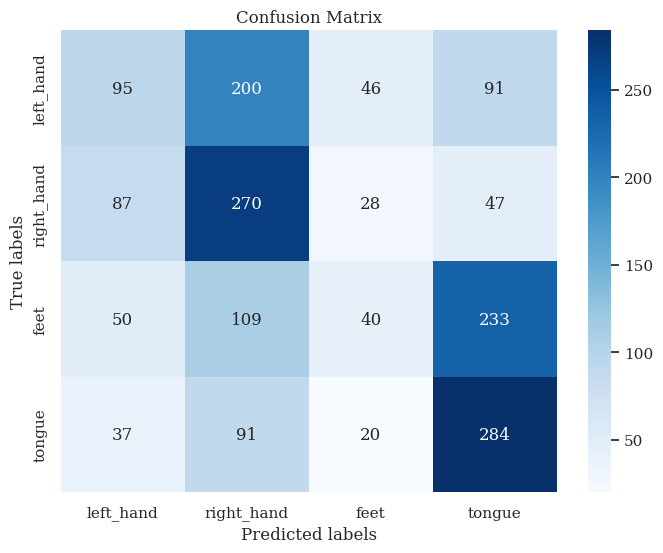

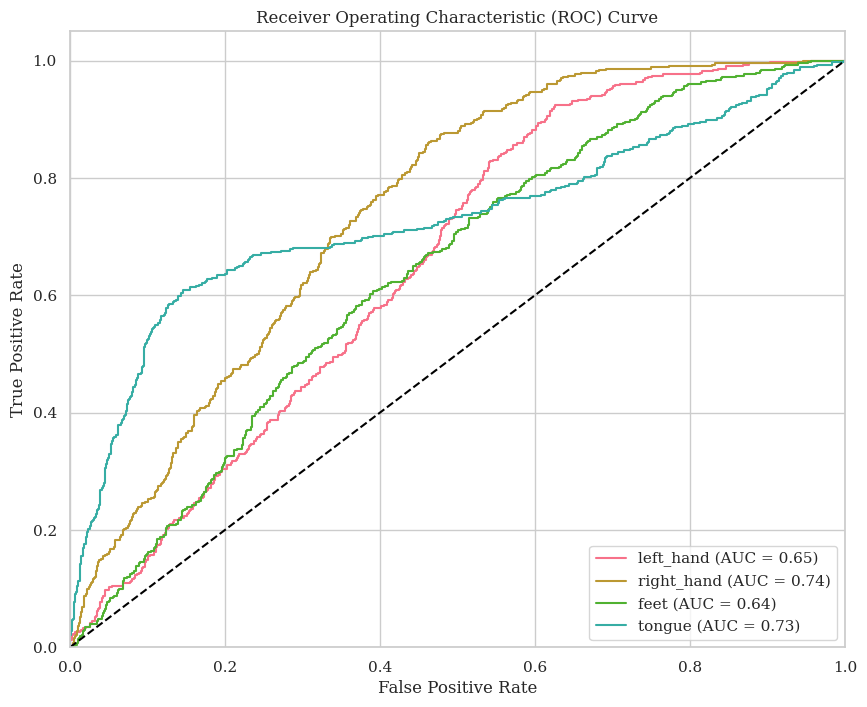

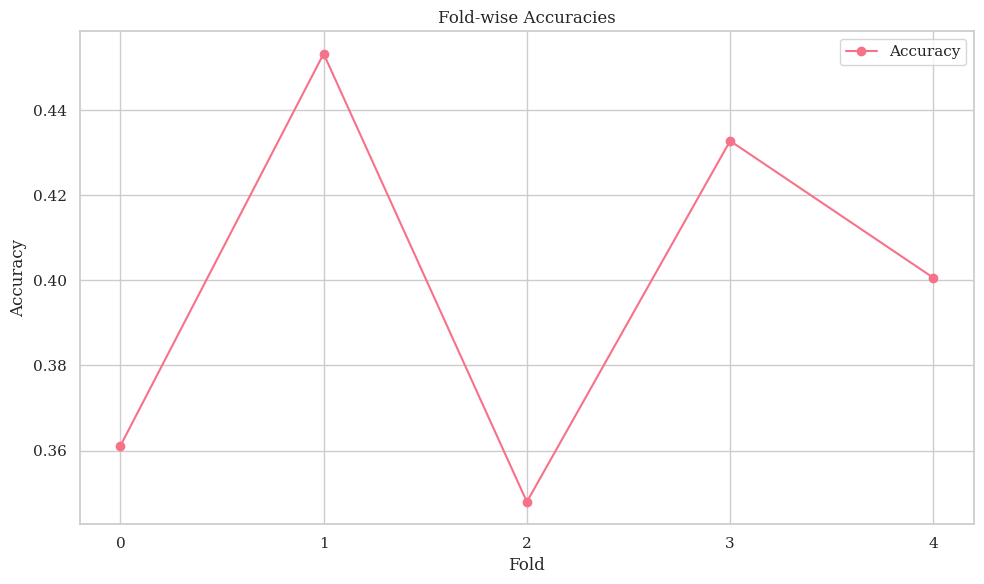

In [ ]:
# Kfolds EEGNet
import torch

import torcheeg.datasets.moabb as moabb_dataset
from torcheeg import transforms

from moabb.datasets import BNCI2014001
from torch.utils.data import DataLoader
from torcheeg.trainers import ClassifierTrainer

import pytorch_lightning as pl

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc
import seaborn as sns
import numpy as np
from torcheeg.model_selection import KFoldGroupbyTrial

dataset = BNCI2014001()
dataset.subject_list = [1, 2, 3]
paradigm = MotorImagery()
dataset = moabb_dataset.MOABBDataset(
    dataset=dataset,
    paradigm=paradigm,
    io_path='./moabb/BNCI2014001/eegnet',
    online_transform=transforms.Compose([
                                          transforms.To2d(),
                                          transforms.ToTensor(),
                                          ]),
    label_transform=transforms.Compose([
    transforms.Select('label'),
    transforms.Mapping({
        'left_hand': 0,
        'right_hand': 1,
        'feet': 2,
        'tongue': 3
    })
  ]))

print(dataset[0][0].shape) #torch.Size([1, 22, 1001])

from torcheeg.trainers import ClassifierTrainer
from torcheeg.models import EEGNet


k_fold = KFoldGroupbyTrial(n_splits=5,
                           split_path='./tmp_out/eegnet/kfold_split/',
                           shuffle=True,
                           random_state=42)

all_true_labels = []
all_predicted_labels = []
all_predicted_probs = []
fold_accuracies = []

for i, (train_dataset, val_dataset) in enumerate(k_fold.split(dataset)):
    train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)

    model = EEGNet(chunk_size=1001,
                  num_electrodes=22,
                  dropout=0.5,
                  kernel_1=64,
                  kernel_2=16,
                  F1=8,
                  F2=16,
                  D=2,
                  num_classes=4)

    trainer = ClassifierTrainer(model=model,
                                num_classes=4,
                                lr=1e-4,
                                weight_decay=1e-4,
                                accelerator="gpu")
    trainer.fit(train_loader,
                val_loader,
                max_epochs=30,
                default_root_dir=f'./tmp_out/eegnet/model/{i}',
                callbacks=[pl.callbacks.ModelCheckpoint(save_last=True)],
                enable_progress_bar=True,
                enable_model_summary=True,
                limit_val_batches=0.0)
    score = trainer.test(val_loader,
                        enable_progress_bar=True,
                        enable_model_summary=True)[0]
    fold_accuracy = score["test_accuracy"]
    print(f'Fold {i} test accuracy: {fold_accuracy:.4f}')
    fold_accuracies.append(fold_accuracy)

    # evaluated the model created in every fold
    model.eval()
    with torch.no_grad():
        for data, true_labels in val_loader:
            outputs = model(data)
            _, predicted_labels = torch.max(outputs, 1)

            all_true_labels.extend(true_labels.cpu().numpy())
            all_predicted_labels.extend(predicted_labels.cpu().numpy())
            all_predicted_probs.extend(torch.nn.functional.softmax(outputs, dim=1).cpu().numpy())
# Metrics
# 1. Confusion matrix
labels = ["left_hand", "right_hand", "feet", "tongue"]

cm = confusion_matrix(all_true_labels, all_predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# 2. Plot ROC curve
true_labels_onehot = np.eye(4)[all_true_labels]  # Adjusted for 4 classes

plt.figure(figsize=(10, 8))
for i, label in enumerate(labels):
    fpr, tpr, _ = roc_curve(true_labels_onehot[:, i], np.array(all_predicted_probs)[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='%s (AUC = %0.2f)' % (label, roc_auc))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


# Fold accuracies
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(fold_accuracies, '-o', label='Accuracy')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Fold-wise Accuracies')
plt.xticks(range(len(fold_accuracies)))  # set x-ticks to be the fold numbers
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Results <br>
After running the model for around 30 epochs with the current parameters you should get an AUC score of 0.65 on all 4 prediction categories. <br>
The interpretation of the other plots follow the same logic as the TSCeption. In general TSCeption offers better results in the same number of epochs for decoding this motor imagery task.